# Notebook for selecting noise scale

Generally, SONATA is robust across a wide range of noise scales. In principle, the selection of the noise scaling factor should be data-dependent, as different manifolds exhibit varying sensitivity to perturbations. For example, a data modality with a clear and low-noise structure remains robust even under a large noise scale without losing manifold coherence, whereas a modality already affected by substantial noise is more susceptible to further disruption. By default, the noise scale is set to 0.2 in SONATA. To guide the selection of the noise scaling factor, we also offer a data-driven strategy grounded in the manifold similarity criterion.

Below is an example on the SNARE-seq dataset. First, we visualize how the noise scale affects manifold similarity. Then, we apply the selected noise scale in SONATA to detect ambiguity.

### 1. Load dataset

In [1]:
import os
import yaml
from types import SimpleNamespace
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker  
from sklearn.preprocessing import normalize

import sys
sys.path.append(os.path.dirname(os.getcwd()))
import sonata
from utils.utils import *
from utils.vis import *

# load dataset
with open("./cfgs/SNARE.yaml", "r") as file:
        params = yaml.safe_load(file)
params = SimpleNamespace(**params)
        
data_url1 = os.path.join(params.data_path, params.data_url1)
data_url2 = os.path.join(params.data_path, params.data_url2)
data1 = load_data(data_url1, )
data2 = load_data(data_url2, )
data1 = normalize(data1, norm=params.norm)
data2 = normalize(data2, norm=params.norm)

/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### 2. Visualize how the noise scale affects manifold similarity

Select the noise level according to the visualization or the threshold

Selected noise level for chromatin accessibility modality=0.5
Selected noise level for gene expression modality=0.1


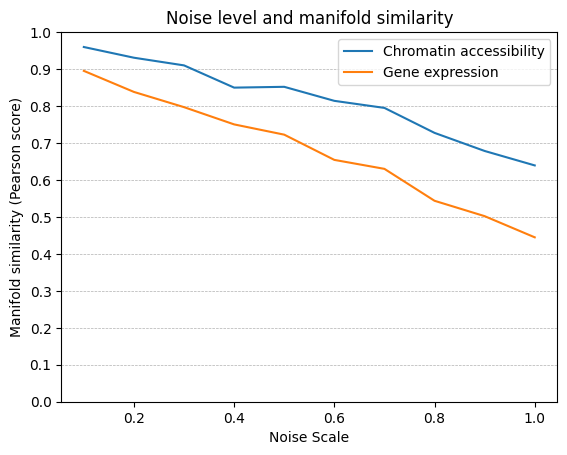

In [2]:
# calculate manifold similarity with different noise levels
pearsonr_list1, selected_noise1 = noise_range_test(data1, params.n_neighbor, params.mode, params.metric, target_corr=0.85)
pearsonr_list2, selected_noise2 = noise_range_test(data2, params.n_neighbor, params.mode, params.metric, target_corr=0.85)
print("Selected noise level for chromatin accessibility modality={}".format(selected_noise1))
print("Selected noise level for gene expression modality={}".format(selected_noise2))

# visualize the relationship between noise level and manifold similarity
fig, ax = plt.subplots()
plt.plot(np.arange(0.1, 1.01, 0.1), pearsonr_list1, label='Chromatin accessibility')
plt.plot(np.arange(0.1, 1.01, 0.1), pearsonr_list2, label='Gene expression')
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.grid(axis='y', linestyle='--', linewidth=0.5)
plt.ylim(0, 1)
plt.xlabel("Noise Scale")
plt.ylabel("Manifold similarity (Pearson score)")
plt.title("Noise level and manifold similarity")
plt.legend()
plt.show()


### 3. Apply selected noise scale to detect ambiguity

Chromatin Accessibility Modality

/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
  0%|          | 0/10 [00:00<?, ?it/s]/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "
 10%|█         | 1/10 [02:05<18:50, 125.61s/it]/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "
 20%|██        | 2/10 [03:54<15:28, 116.05s/i

cannot_link shape=8990
data_shape = (228, 19)
k=1
k=2
k=3
k=4
k=5
k=6
k=7
k=8
k=9
k=10


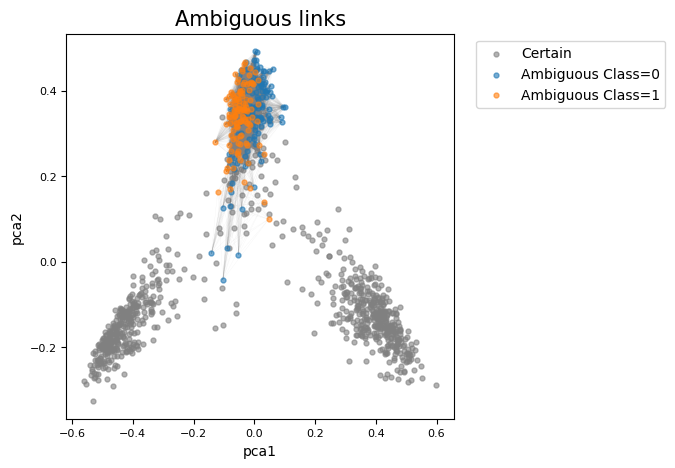

In [3]:
sn1 = sonata.sonata(noise_scale=selected_noise1, n_neighbor=params.n_neighbor, n_cluster=params.n_cluster, verbose=False)
DiagnoseResult1 = sn1.diagnose(data1)
plt_cannotlink_by_labelcolor(data1, DiagnoseResult1.ambiguous_idx, DiagnoseResult1.ambiguous_labels, DiagnoseResult1.cannot_links, alpha=0.6, cl_alpha = 0.1, show=True)

Gene expression modality

/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
  0%|          | 0/10 [00:00<?, ?it/s]

/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "
 10%|█         | 1/10 [01:40<15:06, 100.69s/it]/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "
 20%|██        | 2/10 [02:49<10:54, 81.84s/it] /Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not 

cannot_link shape=37895
data_shape = (558, 10)
k=1
k=2
k=3
k=4
k=5
k=6
k=7
k=8
k=9
k=10


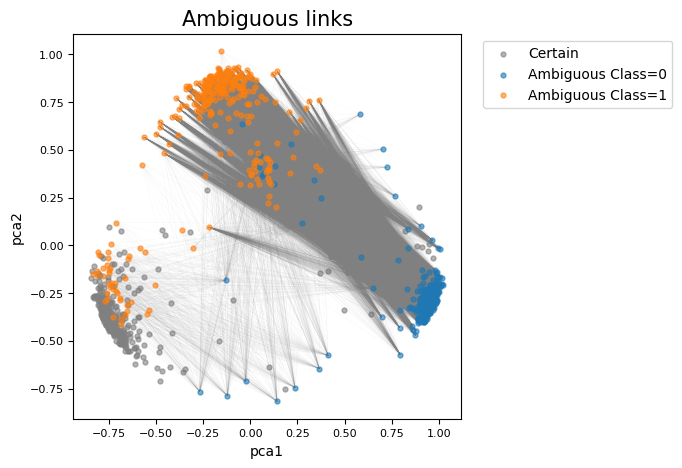

In [4]:
sn2 = sonata.sonata(noise_scale=selected_noise2, n_neighbor=params.n_neighbor, n_cluster=params.n_cluster, verbose=False)
DiagnoseResult2 = sn2.diagnose(data2)
plt_cannotlink_by_labelcolor(data2, DiagnoseResult2.ambiguous_idx, DiagnoseResult2.ambiguous_labels, DiagnoseResult2.cannot_links, alpha=0.6, cl_alpha = 0.1, show=True)